# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

who: The Finance Director, because they control the budget and care most about cost savings
what: We need to re-evaluate the contract with Carrier Z because they are currently overcharging us by X% compared to the market rate.
How: A Bar Chart comparing the average freight rate of Carrier Z vs. the average rate of competitors, highlighting the price gap.

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [3]:
#pulling new dataset from kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datasetengineer/logistics-and-supply-chain-dataset")

print("Path to dataset files:", path)


100%|██████████| 6.89M/6.89M [00:00<00:00, 12.0MB/s]

Extracting files...


Path to dataset files: C:\Users\gjgut\.cache\kagglehub\datasets\datasetengineer\logistics-and-supply-chain-dataset\versions\1


In [4]:
import os
files = os.listdir(path)
print(files)

['dynamic_supply_chain_logistics_dataset.csv']


In [16]:
data = pd.read_csv(os.path.join(path, 'dynamic_supply_chain_logistics_dataset.csv'))
data.describe(include='all')

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
count,32065,32065.000000,32065.000000,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,3.206500e+04,32065.000000,...,32065.000000,3.206500e+04,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,32065.000000,32065,32065.000000
unique,32065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High Risk,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23944,NaN
mean,NaN,38.023589,-90.116648,8.011735,2.893068,4.991493e+00,2.992547e+02,2.291669,3.026954e-01,0.600740,...,0.044792,2.972816e-01,7.001144,2.296448,4.983913e-01,6.008723e-01,0.803656,0.699077,NaN,5.177648
std,NaN,6.917909,17.369244,4.264960,2.274044,3.532048e+00,3.234435e+02,1.554202,3.259146e-01,0.345672,...,14.187486,3.216115e-01,3.236328,1.555932,3.541589e-01,3.458101e-01,0.279185,0.324514,NaN,4.157988
min,NaN,30.000000,-119.999998,5.000000,-1.999993,1.091633e-09,1.322210e-12,0.500000,4.565769e-16,0.000001,...,-10.000000,7.255415e-19,0.000050,0.500000,4.043927e-09,3.269508e-07,0.000048,0.000003,NaN,-1.999998
25%,NaN,31.280550,-106.253913,5.019984,1.185744,1.474720e+00,1.605163e+01,0.774798,1.710828e-02,0.277096,...,-9.931074,1.678269e-02,4.593407,0.776166,1.443567e-01,2.783148e-01,0.693739,0.456009,NaN,1.269197
50%,NaN,36.413820,-86.293414,5.636036,3.882059,4.981244e+00,1.572880e+02,1.917121,1.595151e-01,0.680553,...,-7.858681,1.549760e-01,8.385605,1.938273,4.988468e-01,6.831130e-01,0.958128,0.839599,NaN,6.113662
75%,NaN,44.453655,-73.079367,9.669944,4.884355,8.534902e+00,5.405980e+02,3.734188,5.535954e-01,0.938160,...,6.024012,5.405408e-01,9.836152,3.750817,8.510762e-01,9.372889e-01,0.998746,0.982391,NaN,9.249206


In [17]:
data.duplicated().sum()

np.int64(0)

In [20]:
data.median(numeric_only=True)

vehicle_gps_latitude                 36.413820
vehicle_gps_longitude               -86.293414
fuel_consumption_rate                 5.636036
eta_variation_hours                   3.882059
traffic_congestion_level              4.981244
warehouse_inventory_level           157.288022
loading_unloading_time                1.917121
handling_equipment_availability       0.159515
order_fulfillment_status              0.680553
weather_condition_severity            0.496178
port_congestion_level                 8.383225
shipping_costs                      388.996911
supplier_reliability_score            0.503266
lead_time_days                        3.297654
historical_demand                  6785.123209
iot_temperature                      -7.858681
cargo_condition_status                0.154976
route_risk_level                      8.385605
customs_clearance_time                1.938273
driver_behavior_score                 0.498847
fatigue_monitoring_score              0.683113
disruption_li

In [21]:
data['shipping_costs'].describe()

count    32065.000000
mean       459.374452
std        312.183487
min        100.000000
25%        154.017124
50%        388.996911
75%        753.007203
max        999.999853
Name: shipping_costs, dtype: float64

<Axes: title={'center': 'Shipping Costs Distribution'}, ylabel='Frequency'>

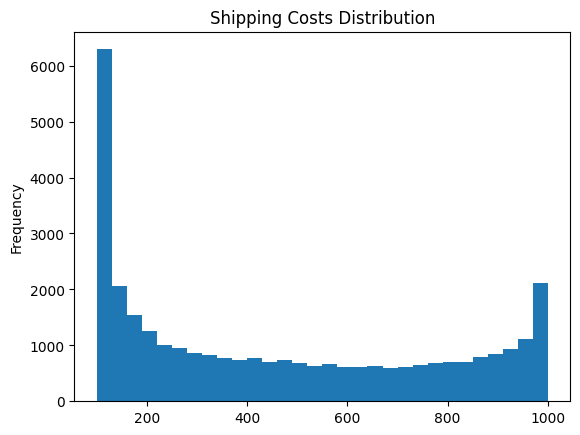

In [22]:
data['shipping_costs'].plot(kind='hist', bins=30, title='Shipping Costs Distribution')

<Axes: title={'center': 'shipping_costs'}, xlabel='risk_classification'>

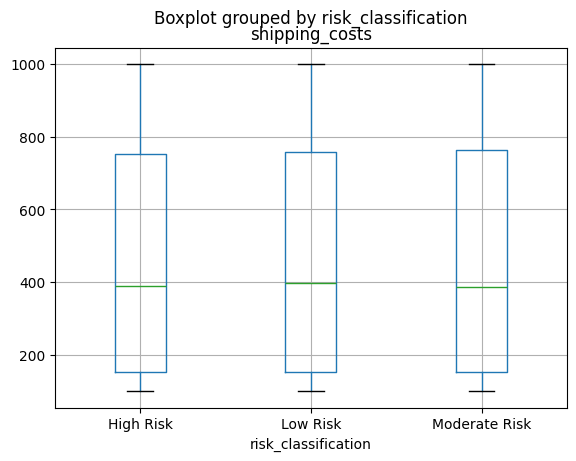

In [23]:
data.boxplot(column='shipping_costs', by='risk_classification')

In [29]:
data['order_fulfillment_status'].unique()

array([0.76116617, 0.19659403, 0.15274152, ..., 0.43768722, 0.51705119,
       0.98576127], shape=(32065,))

In [26]:
risk_mapping = {'Low Risk': 1, 'Moderate Risk': 2, 'High Risk': 3}
data['risk_encoded'] = data['risk_classification'].map(risk_mapping)
data[['risk_classification', 'risk_encoded']].head()

,risk_classification,risk_encoded
0,Moderate Risk,2
1,High Risk,3
2,High Risk,3
3,High Risk,3
4,High Risk,3


In [31]:
data['risk_classification'].value_counts()

risk_classification
High Risk        23944
Moderate Risk     5011
Low Risk          3110
Name: count, dtype: int64

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows? Nope

- Are there any duplicate values in a given column (when this would be inappropriate?) no Order ID's so can skip

- What are the mean, median, and mode of each column?
to many to paste here but its in the .describe() output

- Are there any missing or null values? nope

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row? there are several ways to handle missing values depending on the context and nature of the data.

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.) no inconsistencies found

- Encode any categorical variables (e.g. with one-hot encoding.) ordinal encoded risk_classification

### Conclusions:

- Are the data usable?  If not, find some new data! Yes data is usable

- Do you need to modify or correct the data in some way? just the risk_classification encoding. the order_fulfillment_status was already in percentages

- Is there any class imbalance?  (Categories that have many more items than other categories). Yes the risk_classification is imabalanced with high risk being the majority class.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [32]:
import matplotlib.pyplot as plt

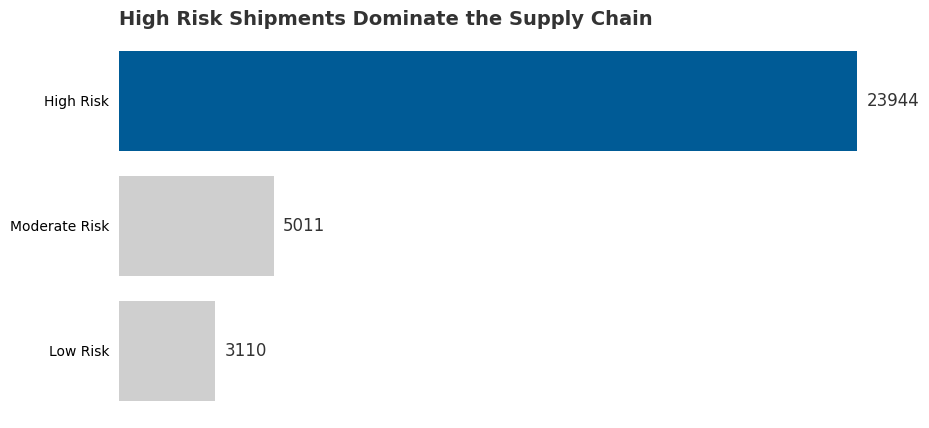

In [33]:
counts = pd.Series([3110, 5011, 23944], index=['Low Risk', 'Moderate Risk', 'High Risk'])
colors = ['#cfcfcf', '#cfcfcf', '#005b96']

fig, ax = plt.subplots(figsize=(10,5))
bars = ax.barh(counts.index, counts.values, color=colors)

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([])
ax.tick_params(left=False)

for bar in bars:
    width = bar.get_width()
    ax.text(width + 300, bar.get_y() + bar.get_height()/2,
            f'{width}', va='center', fontsize=12, color='#333333')
    
plt.title('High Risk Shipments Dominate the Supply Chain', loc='left', fontsize=14, fontweight='bold', color='#333333')
plt.show()